### READ ME
This is a final project for the course 'Business Data Analytics, Quantitative Methods and Visualization' (2021, Copenhagen Business School).

The goal of this project is to be able to predict the outcome of a certain UFC fight, more specifically to predict whether the Red or Blue fighter is more likely to win the match. Further, we are also going to do some calculations about how much profit one could have earned in posession of this code from 1993.


# 1. Importing necessary libraries and tools.

In [1]:
# libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

# models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 

# other tools

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings

# 2. Loading, Cleaning & Exploring the dataset.

### 2.1 Load excel file (ufc.xlsx) and print out the first couple rows.

In [2]:
ufc = pd.read_excel('dataset_3.0.xlsx')

### 2.2 Get number of rows and columns.

In [3]:
print('Number of rows:', ufc.shape[0])
print('Number of columns:', ufc.shape[1])

Number of rows: 5144
Number of columns: 79


### 2.3 Get the list of column names.

In [4]:
column_names = ufc.columns

### 2.4 Check for missing data.

In [5]:
dict(ufc.isna().sum())

{'Unnamed: 0': 0,
 'R_odds_dec': 1288,
 'B_odds_dec': 1288,
 'R_fighter': 0,
 'B_fighter': 0,
 'gender': 840,
 'Referee': 23,
 'date': 0,
 'location': 0,
 'Winner': 0,
 'title_bout': 0,
 'weight_class': 0,
 'no_of_rounds': 0,
 'B_current_lose_streak': 0,
 'B_current_win_streak': 0,
 'B_avg_KD': 1265,
 'B_SLpM': 1265,
 'B_SApM': 1265,
 'B_Sd': 1265,
 'B_total_SIG_STR_landed': 0,
 'B_avg_SIG_STR_landed_per_fight': 1265,
 'B_losses': 0,
 'B_avg_SIG_STR_absorberd_per_fight': 1265,
 'B_total_SIG_STR_absorbed': 0,
 'B_avg_opp_TOTAL_STR_landed': 1265,
 'B_total_rounds_fought': 0,
 'B_total_time_fought(minutes)': 0,
 'B_total_time_fought(seconds)': 0,
 'B_avg_time_fought_per_fight(seconds)': 1265,
 'B_total_title_bouts': 0,
 'B_win_by_Decision_Majority': 0,
 'B_win_by_Decision_Split': 0,
 'B_win_by_Decision_Unanimous': 0,
 'B_win_by_KO/TKO': 0,
 'B_win_by_Submission': 0,
 'B_win_by_TKO_Doctor_Stoppage': 0,
 'B_wins': 0,
 'B_Stance': 159,
 'B_Height_cms': 8,
 'B_Reach_ins': 0,
 'B_UFC_fights': 

### 2.5 Check for duplicates.

In [6]:
duplicates = ufc.duplicated()
ufc[duplicates]

,Unnamed: 0,R_odds_dec,B_odds_dec,R_fighter,B_fighter,gender,Referee,date,location,Winner,...,R_Height_cms,R_Reach_ins,R_Reach_cms,R_Weight_lbs,R_UFC_fights,R_age,Reach_diff_ins,Age_diff,R_odds,B_odds


#### *It seems that there are no duplicates, therefore, we only need to focus on NaN values.*

### 2.6 Fill NaNs with 0 or average values.

In [7]:
ufc[['B_avg_KD', 'B_SLpM', 'B_SApM', 'B_Sd', 'B_avg_SIG_STR_landed_per_fight', 'B_avg_SIG_STR_absorberd_per_fight',
        'B_avg_time_fought_per_fight(seconds)', 'B_Stance',  'B_avg_opp_TOTAL_STR_landed', 'R_avg_KD', 'R_SLpM',
     'R_SApM', 'R_Sd', 'R_avg_SIG_STR_landed_per_fight', 'R_avg_SIG_STR_absorbed_per_fight',
    'R_avg_time_fought_per_fight(seconds)', 'R_Stance',  'R_avg_opp_TOTAL_STR_landed']] = ufc[['B_avg_KD', 
    'B_SLpM', 'B_SApM', 'B_Sd', 'B_avg_SIG_STR_landed_per_fight', 'B_avg_SIG_STR_absorberd_per_fight',
        'B_avg_time_fought_per_fight(seconds)', 'B_Stance',  'B_avg_opp_TOTAL_STR_landed', 'R_avg_KD', 'R_SLpM',
     'R_SApM', 'R_Sd', 'R_avg_SIG_STR_landed_per_fight', 'R_avg_SIG_STR_absorbed_per_fight',
        'R_avg_time_fought_per_fight(seconds)', 'R_Stance',  'R_avg_opp_TOTAL_STR_landed']].fillna(0)

ufc[['R_odds_dec', 'B_odds_dec', 'B_Height_cms', 'B_age', 'B_Reach_cms', 'B_Weight_lbs', 'R_Height_cms', 'R_age', 'R_Reach_cms', 
        'R_Weight_lbs']] = ufc[['R_odds_dec', 'B_odds_dec', 'B_Height_cms', 'B_age', 'B_Reach_cms', 'B_Weight_lbs', 'R_Height_cms', 
        'R_age', 'R_Reach_cms', 'R_Weight_lbs']].fillna(ufc[['R_odds_dec', 'B_odds_dec', 'B_Height_cms', 'B_age', 'B_Reach_cms',
        'B_Weight_lbs', 'R_Height_cms', 'R_age', 'R_Reach_cms', 'R_Weight_lbs']].mean())

ufc_df = ufc
print('Number of rows:', ufc_df.shape[0])
print('Number of columns:', ufc_df.shape[1])

Number of rows: 5144
Number of columns: 79


### 2.7 General features.

#### 2.7.1 Odds.

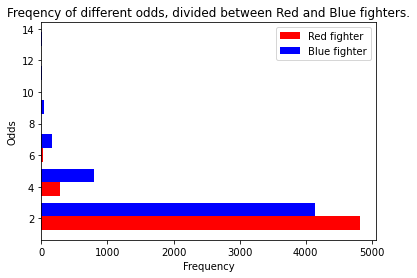

In [8]:
plt.hist(ufc_df[['R_odds_dec', 'B_odds_dec']], color = ['Red', 'Blue'], bins = 6, orientation = 'horizontal', label = ['Red fighter', 'Blue fighter'])
plt.xlabel('Frequency')
plt.ylabel('Odds')
plt.title('Freqency of different odds, divided between Red and Blue fighters.')
plt.legend()
plt.show()

*The graph basically shows that there were approximately 2400 fights where the Red Fighter's odds were around 1-2, while there were only around 1900 where Blue Fighters had such a low odds (which means higher chance to win). However, in case of higher odds (which means less chance of winning the fight) Blue Fighters are dominating.* 

*From these, we can see that Red Fighters have lower odds in general which proves that statistically, they have higher chances to win. This seems logical as Red fighters are usually Favorites and Blue Fighters are underdogs.*

#### 2.7.2 Location.

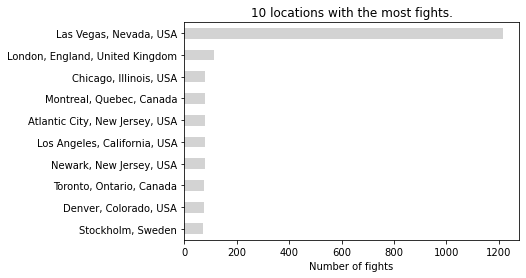

In [21]:
ufc_df['location'].value_counts().head(10).sort_values(ascending = True).plot(kind = 'barh', color = 'Lightgrey')
plt.xlabel('Number of fights')
plt.title('10 locations with the most fights.')
plt.show()

*Seems skewed, it's worth considering leaving location out.*

#### 2.7.3 Winner.

D:\Programmes\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


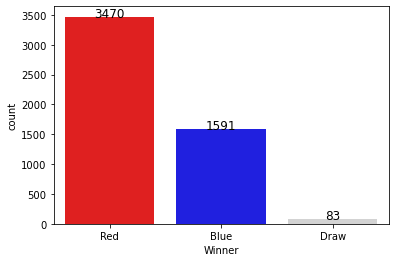

In [10]:
ax = sns.countplot(ufc_df['Winner'], palette = ['Red', 'Blue', 'Lightgrey'])

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(), ha = 'center', va = 'baseline', color = 'black', size = 12
            )

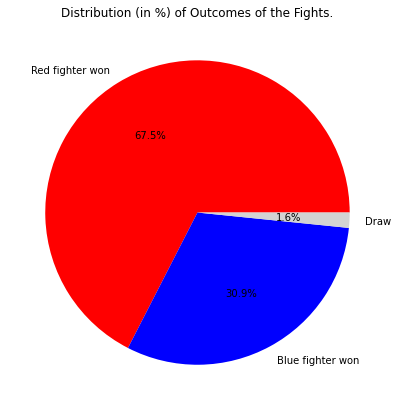

In [11]:
ufc_df['Winner'].value_counts().plot.pie(colors = ['Red', 'Blue', 'Lightgrey'], 
                labels=['Red fighter won', 'Blue fighter won', 'Draw'], autopct='%.1f%%', figsize = (7,7))
plt.ylabel('')
plt.title('Distribution (in %) of Outcomes of the Fights.')
plt.show()

*Based on the 2 graphs above, we can say that Red Fighters win more often which is probably because the Red Fighter is the Favorite.*

*If 67.5% of UFC fights end with a Red-win, one could say that he should always bet on the Red Fighter for higher chances.*

*Our goal is to exceed that 56.2% with our machine learning algorithm, and to be able to make more exact and appropiate decisions.* 

#### 2.7.4 Weight class.

<AxesSubplot:xlabel='weight_class'>

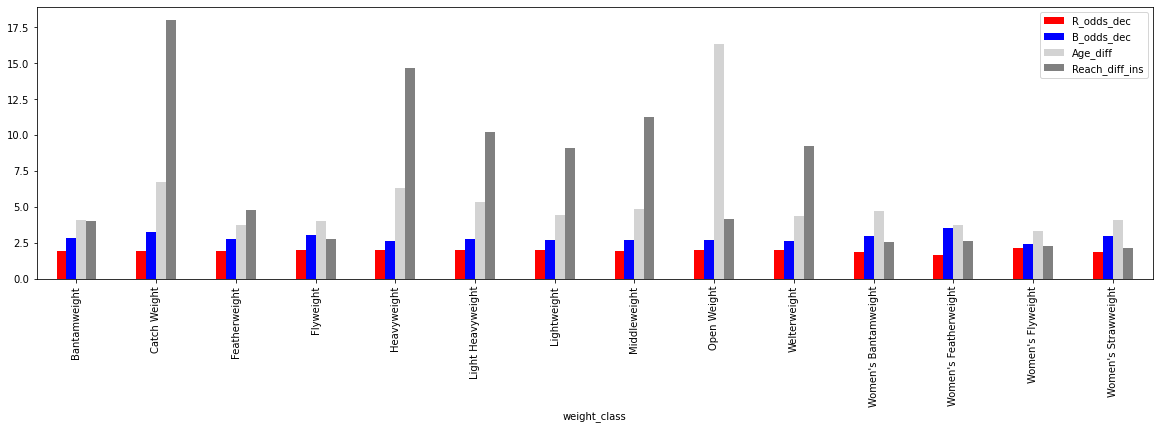

In [17]:
ufc_df[['R_odds_dec', 'B_odds_dec', 'Age_diff', 'Reach_diff_ins', 'weight_class']].groupby('weight_class').mean().plot.bar(figsize=(20,5), color = ['Red', 'Blue', 'Lightgrey', 'Grey', 'Black'])

*We can see that the features included in this visualization highly depend on what weight class we are talking about, therefore, we should definetely include 'weight_class' in our most important features.*

#### 2.7.5 Reach & Age Difference.

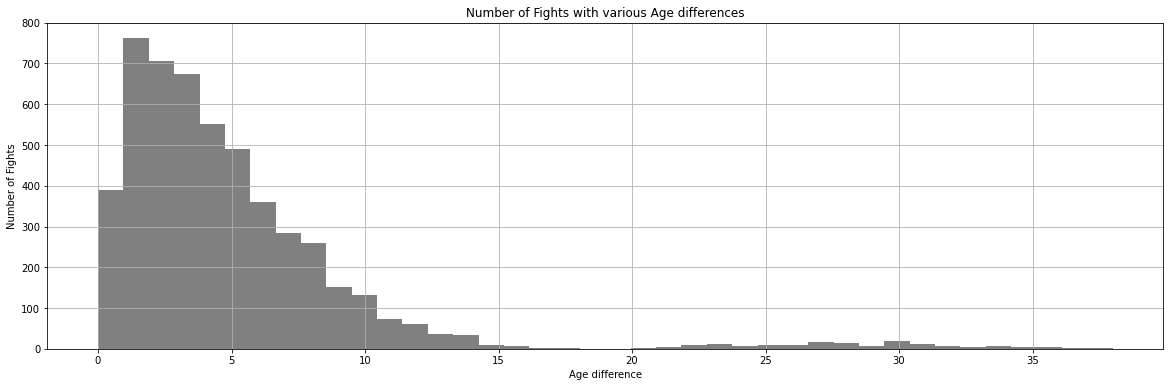

In [18]:
plt.figure(figsize=(20,6))
ufc_df.Age_diff.hist(bins = 40, color = 'grey')
plt.xlabel('Age difference')
plt.ylabel('Number of Fights')
plt.title('Number of Fights with various Age differences')
plt.show()

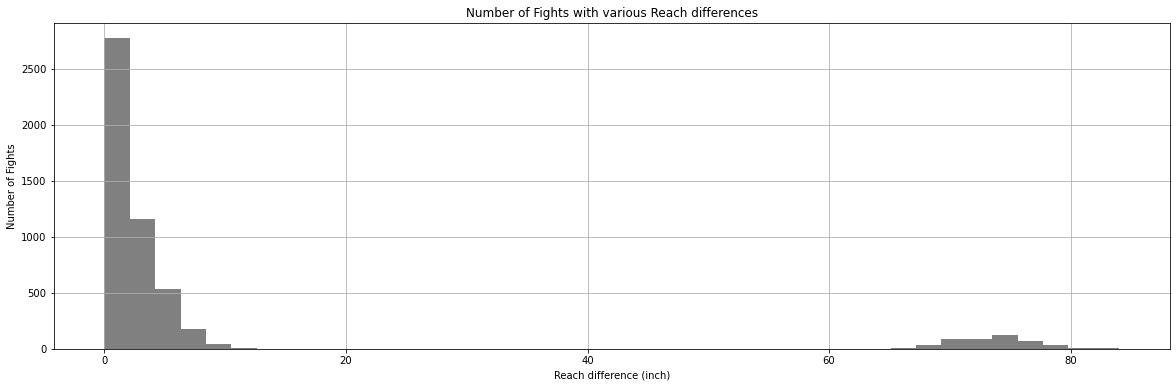

In [19]:
plt.figure(figsize=(20,6))
ufc_df.Reach_diff_ins.hist(bins = 40, color = 'grey')
plt.xlabel('Reach difference (inch)')
plt.ylabel('Number of Fights')
plt.title('Number of Fights with various Reach differences')
plt.show()

### 2.8 Fighter Features.

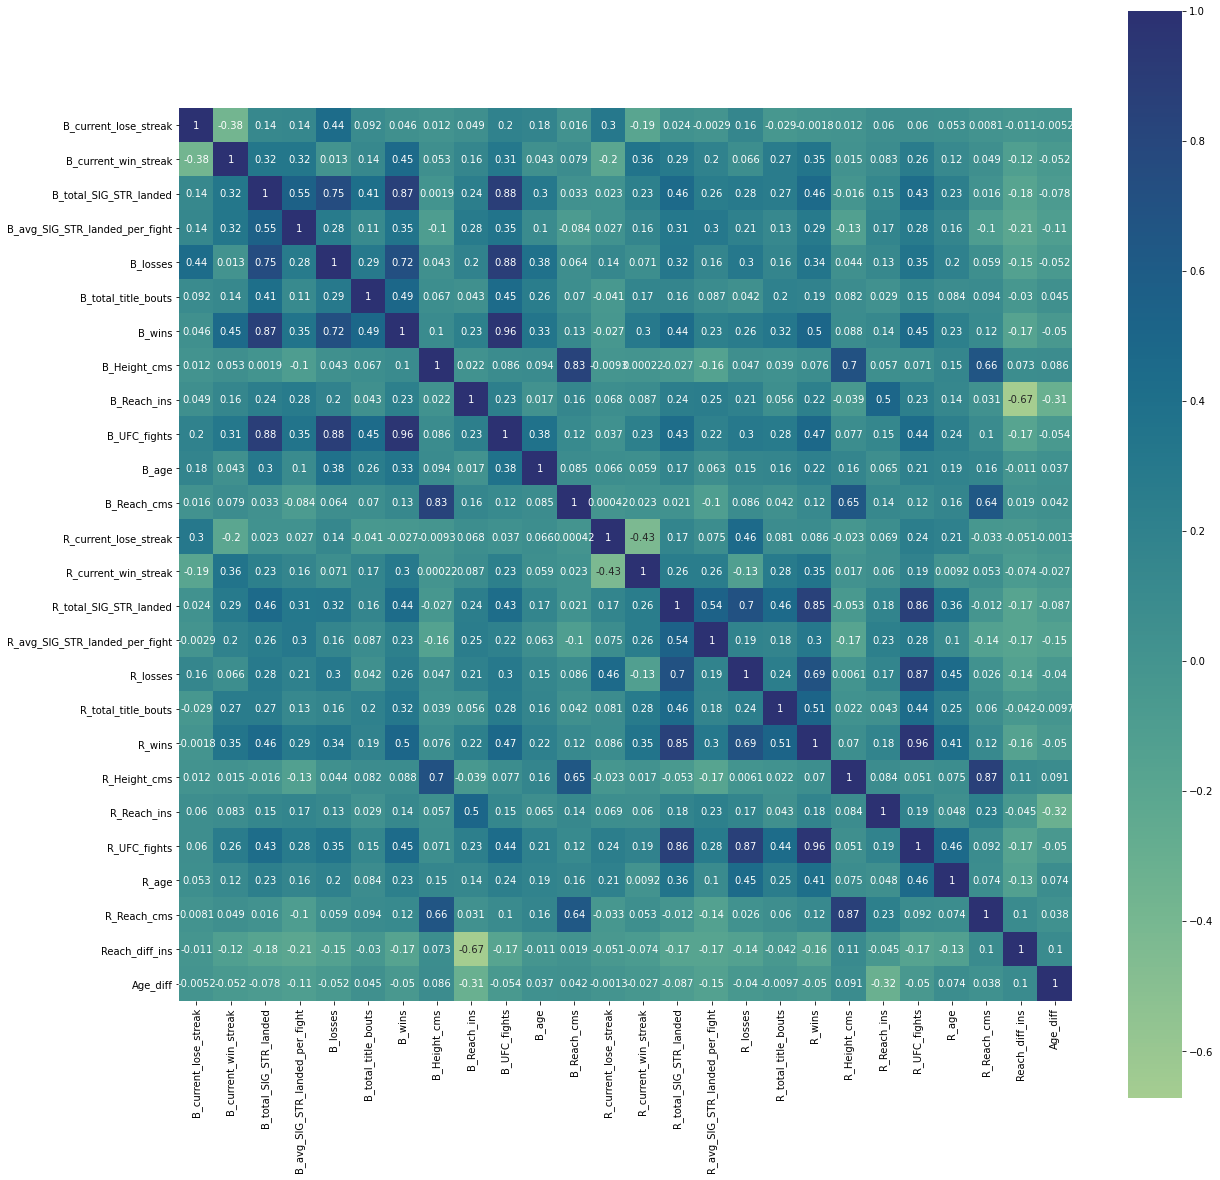

In [22]:
corr_features = ['B_current_lose_streak', 'B_current_win_streak', 'B_total_SIG_STR_landed',
                'B_avg_SIG_STR_landed_per_fight', 'B_losses', 'B_total_title_bouts',
                 'B_wins', 'B_Height_cms', 'B_Reach_ins', 'B_UFC_fights', 'B_age', 'B_Reach_cms', 'R_current_lose_streak',
                 'R_current_win_streak', 'R_total_SIG_STR_landed', 'R_avg_SIG_STR_landed_per_fight', 'R_losses',
                 'R_total_title_bouts', 'R_wins', 'R_Height_cms', 'R_Reach_ins', 'R_UFC_fights', 'R_age', 'R_Reach_cms',
                 'Reach_diff_ins', 'Age_diff']
corr = ufc_df[corr_features].corr(method='pearson')

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.color_palette("crest", as_cmap=True)
sns.heatmap(corr, square= True, annot = True, cmap = cmap)
plt.savefig('heatmap.png')

# 3. Data Pre-processing.

### 3.1 Drop unnecessary columns & drop fights that ended in a draw.

In [23]:
ufc_df = ufc_df.drop(labels = ['R_fighter', 'B_fighter', 'location',
       'Referee', 'date', 'R_odds', 'B_odds', 'R_Weight_lbs', 'B_Weight_lbs', 'no_of_rounds'], axis = 1)

ufc_df = ufc_df.drop(ufc_df[ufc_df.Winner == 'Draw'].index)

### 3.2 Deal with nominal features.

In [25]:
# one hot encoding
onehot_columns = ['weight_class', 'R_Stance', 'B_Stance']

ufc_ohe = pd.get_dummies(ufc_df, columns = onehot_columns, drop_first=True)
ufc_ohe.head()

,Unnamed: 0,R_odds_dec,B_odds_dec,gender,Winner,title_bout,B_current_lose_streak,B_current_win_streak,B_avg_KD,B_SLpM,...,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch
0,0,2.450000,1.606061,FEMALE,Red,True,0,4,0.800000,3.233190,...,0,1,0,0,0,0,1,0,0,0
1,1,1.090909,8.000000,MALE,Red,True,0,3,0.000000,3.625442,...,0,0,0,1,0,0,1,0,0,0
2,2,1.476190,2.750000,MALE,Red,False,0,3,0.645161,4.823151,...,0,1,0,0,0,0,1,0,0,0
3,3,4.000000,1.277778,MALE,Blue,False,0,4,0.500000,6.464724,...,0,1,0,0,0,0,0,0,0,1
4,4,1.625000,2.400000,MALE,Blue,False,0,1,0.000000,3.075000,...,0,0,0,1,0,0,0,0,1,0


In [26]:
X = ufc_ohe[['title_bout',
       'B_current_lose_streak', 'B_current_win_streak', 'B_avg_KD', 'B_SLpM',
       'B_SApM', 'B_Sd', 'B_total_SIG_STR_landed',
       'B_avg_SIG_STR_landed_per_fight', 'B_losses',
       'B_avg_SIG_STR_absorberd_per_fight', 'B_total_SIG_STR_absorbed',
       'B_avg_opp_TOTAL_STR_landed', 'B_total_rounds_fought',
       'B_total_time_fought(minutes)', 'B_total_time_fought(seconds)',
       'B_avg_time_fought_per_fight(seconds)', 'B_total_title_bouts',
       'B_win_by_Decision_Majority', 'B_win_by_Decision_Split',
       'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO', 'B_win_by_Submission',
       'B_win_by_TKO_Doctor_Stoppage', 'B_wins', 'B_Height_cms', 'B_Reach_ins',
       'B_UFC_fights', 'B_age', 'B_Reach_cms', 'R_current_lose_streak',
       'R_current_win_streak', 'R_avg_KD', 'R_SLpM', 'R_SApM', 'R_Sd',
       'R_total_SIG_STR_absorbed', 'R_total_SIG_STR_landed',
       'R_avg_SIG_STR_landed_per_fight', 'R_losses',
       'R_avg_SIG_STR_absorbed_per_fight', 'R_avg_opp_TOTAL_STR_landed',
       'R_total_rounds_fought', 'R_total_time_fought(minutes)',
       'R_total_time_fought(seconds)', 'R_avg_time_fought_per_fight(seconds)',
       'R_total_title_bouts', 'R_win_by_Decision_Majority',
       'R_win_by_Decision_Split', 'R_win_by_Decision_Unanimous',
       'R_win_by_KO/TKO', 'R_win_by_Submission',
       'R_win_by_TKO_Doctor_Stoppage', 'R_wins', 'R_Height_cms', 'R_Reach_ins',
       'R_Reach_cms', 'R_UFC_fights', 'R_age', 'Reach_diff_ins', 'Age_diff',
       'weight_class_Catch Weight', 'weight_class_Featherweight',
       'weight_class_Flyweight', 'weight_class_Heavyweight',
       'weight_class_Light Heavyweight', 'weight_class_Lightweight',
       'weight_class_Middleweight', 'weight_class_Open Weight',
       'weight_class_Welterweight', 'weight_class_Women\'s Bantamweight',
       'weight_class_Women\'s Featherweight', 'weight_class_Women\'s Flyweight',
       'weight_class_Women\'s Strawweight', 'R_Stance_Open Stance',
       'R_Stance_Orthodox', 'R_Stance_Sideways', 'R_Stance_Southpaw',
       'R_Stance_Switch', 'B_Stance_Open Stance', 'B_Stance_Orthodox',
       'B_Stance_Sideways', 'B_Stance_Southpaw', 'B_Stance_Switch']]
y = ufc_ohe['Winner']

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (5061, 84)
y shape: (5061,)


### 3.3 Select the 20 most influential features & select the best features.

In [40]:
# selecting best features
#print(X.shape)

k_best = SelectKBest(k = 20)
k_best.fit(X, y)
X_train_k_best = k_best.transform(X)
# X_test_k_best = k_best.transform(X)

#print(X_train_k_best.shape)
#print(X.columns[k_best.get_support()])

best_features = X.columns[k_best.get_support()]

#warnings.filterwarnings("ignore")

X = ufc_ohe[best_features]
y = ufc_ohe['Winner']

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (5061, 20)
y shape: (5061,)


### 3.4 Define train and test sets.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### 3.5 Deal with numerical features.

In [42]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# 4. Machine Learning Models.

### 4.1 Build models.

In [43]:
# knn
knn = KNeighborsClassifier()

# neural network
mpl = MLPClassifier()

# decision tree
tree = DecisionTreeClassifier()

# random forest
forest = RandomForestClassifier()

classifiers = (knn, mpl, tree, forest)

### 4.2 Build the 'applyModel' function.

In [44]:
def applyModel(model,name,X_train, y_train, X_test, y_test):
    m = model.fit(X_train,y_train)
    print(name, '- Training accuracy:', m.score(X_train, y_train))
    print(name, '- Testing accuracy:', m.score(X_test, y_test))

### 4.3 Train and test with the different models.

In [45]:
for c in classifiers:
    n = str(c)
    applyModel(c, n, X_train, y_train, X_test, y_test)
    print('')
    
warnings.filterwarnings("ignore")

KNeighborsClassifier() - Training accuracy: 0.7646903820816864
KNeighborsClassifier() - Testing accuracy: 0.6524486571879937

MLPClassifier() - Training accuracy: 0.7111989459815546
MLPClassifier() - Testing accuracy: 0.7148499210110585

DecisionTreeClassifier() - Training accuracy: 0.9971014492753624
DecisionTreeClassifier() - Testing accuracy: 0.6263823064770933

RandomForestClassifier() - Training accuracy: 0.9971014492753624
RandomForestClassifier() - Testing accuracy: 0.6919431279620853



### 4.4 Prinipal component analysis (PCA)

In [46]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [47]:
principalDf

,principal component 1,principal component 2
0,3990.664903,-91.860180
1,4019.727305,428.069381
2,5654.348577,-49.110802
3,2094.394780,177.967509
4,-1672.617479,730.757770
...,...,...
5056,-3453.806615,-237.239371
5057,-3487.133386,-485.590299
5058,-3487.302651,-487.369476
5059,-3487.301003,-487.369468


In [48]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [49]:
finalDf

,principal component 1,principal component 2,Winner
0,3990.664903,-91.860180,Red
1,4019.727305,428.069381,Red
2,5654.348577,-49.110802,Red
3,2094.394780,177.967509,Blue
4,-1672.617479,730.757770,Blue
...,...,...,...
5139,NaN,NaN,Red
5140,NaN,NaN,Red
5141,NaN,NaN,Red
5142,NaN,NaN,Red


In [50]:
# explained of the variance. We can see that the first explains most of the variance 
pca.explained_variance_ratio_

array([0.98693567, 0.0075623 ])

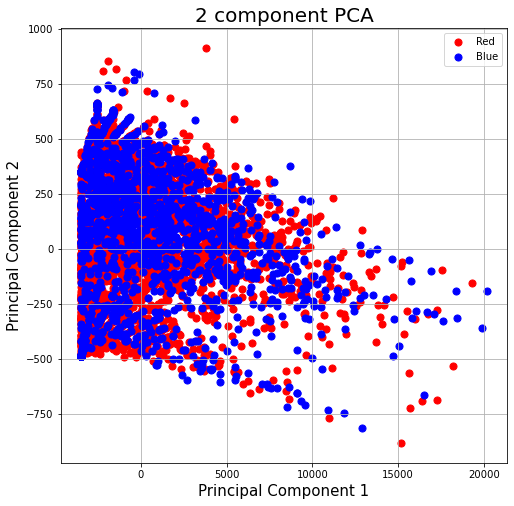

In [51]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Red', 'Blue']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Winner'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#### 4.4.1 Heatmap of components 

In [52]:
pca.components_

array([[ 1.69242739e-03,  1.10312747e-03,  2.45900738e-02,
         1.50869623e-03,  6.92872224e-05,  4.36097792e-02,
         5.28206507e-02,  2.06972211e-03,  4.64394048e-04,
         1.56558313e-03,  2.23281171e-03,  3.60711041e-03,
         1.66081264e-02,  9.96487583e-01,  3.74859200e-02,
         8.41724771e-05,  8.06348770e-04,  1.37620750e-03,
         4.78781913e-04, -9.36246926e-04],
       [ 4.60891651e-02,  4.37606813e-02,  9.23413038e-01,
         1.63842702e-02,  1.11666011e-03,  3.54674012e-03,
         7.16803852e-03,  2.07054011e-02, -3.51656418e-04,
         1.79353407e-02,  2.72730809e-02, -4.70975769e-04,
        -6.27947608e-04, -3.76768565e-02,  3.73981522e-01,
         6.65936609e-05,  8.13813259e-03, -5.68475779e-04,
         2.31961222e-06, -9.60573320e-03]])

<AxesSubplot:xlabel='None'>

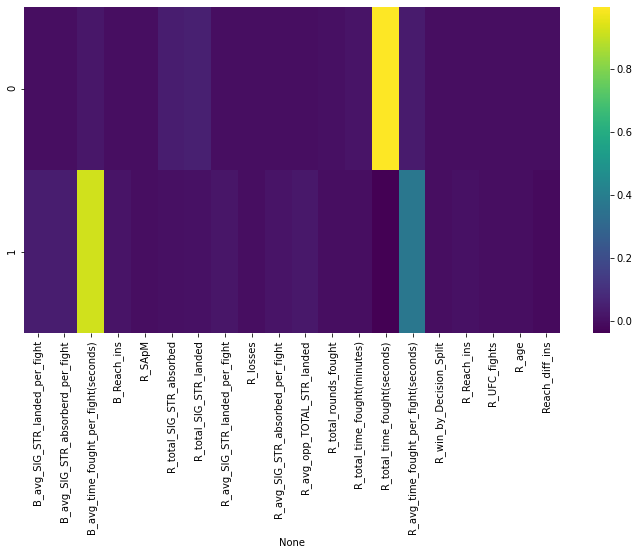

In [53]:
map = pd.DataFrame(pca.components_,columns=[best_features])
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='viridis')

#### 4.4.2 Fit the PCA model & transform the X_train & and X_test

In [54]:
pca.fit(X_train)

PCA(n_components=2)

In [55]:
pca_train = pca.transform(X_train)
pca_test = pca.transform(X_test)

#### 4.4.3 Testing Neural Network & Random Forest on PCA transformed data

In [71]:
mlp = MLPClassifier(alpha=0.01, learning_rate="invscaling", hidden_layer_sizes = 10)

mlp.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(mlp.score(X_test, y_test)))

Accuracy on the training set: 0.700
Accuracy on test set: 0.714


In [72]:
knn = RandomForestClassifier(max_depth = 7, criterion = 'gini')

knn.fit(pca_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(knn.score(pca_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(knn.score(pca_test, y_test)))

Accuracy on the training set: 0.710
Accuracy on test set: 0.700


*We are not satisfied with the accuracy & test score, so we do not continue using the PCA transformed data.*

### 4.5 Play around with KNN on normal X_train,X_test, y_train, & y_test

In [117]:
## the code is working, however, we do not need to run it to get our results.

# training_accuracy = []
# testing_accuracy = []
# number_of_neighbors =[]
# weighting_choice = []

# weight_values = ['distance', 'uniform']

# for n_neighbors in range(1,100):
    # for weights in weight_values:
        # clf = KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights)
        # clf.fit(X_train, y_train)
        # training_accuracy.append(clf.score(X_train, y_train))
        # testing_accuracy.append(clf.score(X_test, y_test))
        # number_of_neighbors.append(n_neighbors)
        # weighting_choice.append(weights)
      
     
# combinations_sorted_knn = sorted(list(zip(number_of_neighbors, weighting_choice, training_accuracy, testing_accuracy)), key = lambda e:e[3], reverse = True)

# print('Top 5 results, sorted by test accuracy:\n')
# print(*combinations_sorted_knn[0:5], sep = "\n")

## save the best variables
# knn_best_n_neighbors = combinations_sorted_knn[0][0]
# knn_best_weights = combinations_sorted_knn[0][1]

#### 4.5.1 KNN - Cross validation

In [60]:
#We define the parameters which want to test for the KNN model
param_grid = {
    "n_neighbors": [32,54,74,100], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhatten"], "leaf_size": [10,30,60]
}

#We make the model with cross validation and grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)

#We fit the model, with the best parameters: 
gs_result = grid_search.fit(X_train, y_train)

#print the results: 

print(
    "\n Training score: ", gs_result.best_score_, 
    "\n Best estimator: ", gs_result.best_estimator_
    # ,"\n best parameters: ", gs_result.best_params_
)

print("Test score: ", grid_search.score(X_test,y_test))



 Training score:  0.6917087904457714 
 Best estimator:  KNeighborsClassifier(leaf_size=10, metric='euclidean', n_neighbors=100)
Test score:  0.7101105845181674


In [74]:
knn_score = grid_search.score(X_test,y_test)

### 4.6 Play around with Neural Network.

In [116]:
## the code is working, however, we do not need to run it to get our results.

# train_acc = []
# test_acc = []
# alpha_value = []
# learning_rate_value = []
# hidden_layer_sizes_value = []


# alphas = (0.0001, 0.001, 0.1, 0, 1, 5)
# learning_rates = ('constant', 'invscaling', 'adaptive')
# hidden_layer_sizes = (1,10,50,80,100,200,250)

# for a in alphas:
    # for l in learning_rates:
        # for f in hidden_layer_sizes:
            # mpl = MLPClassifier(alpha = a, learning_rate = l, hidden_layer_sizes = f)
            # mpl.fit(X_train, y_train)
            # train_acc.append(accuracy_score(mpl.predict(X_train), y_train))
            # test_acc.append(accuracy_score(mpl.predict(X_test), y_test))
            # alpha_value.append(a)
            # learning_rate_value.append(l)
            # hidden_layer_sizes_value.append(f)
            
        

# combinations_sorted_mpl = sorted(list(zip(alpha_value, learning_rate_value, train_acc, test_acc)), key = lambda e:e[3], reverse = True)

# print('Top 5 results, sorted by test accuracy:\n')
# print(*combinations_sorted_mpl[0:5], sep = "\n")

## save the best variables
# mpl_best_alpha = combinations_sorted_knn[0][0]
# mpl_best_learning_rate = combinations_sorted_knn[0][1]

SyntaxError: invalid syntax (<ipython-input-116-a27763a0bf17>, line 30)

#### 4.6.1 Neural Network - Cross validation

In [62]:
#We define the parameters which want to test for the decision tree model
param_grid = {"learning_rate":["constant", "invscaling", "adaptive"], "alpha":[0.0001, 0.001, 0.05, 0.1, 0, 1, 5], "hidden_layer_sizes":[1,10,50, 80, 100,200,250]}

#We make the model with cross validation and grid search
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=10)

#We fit the model, with the best parameters: 
gs_result = grid_search.fit(X_train, y_train)

#print the results: 

print(
    "\n Training score: ", gs_result.best_score_, 
    "\n Best estimator: ", gs_result.best_estimator_,
    "\n best parameters: ", gs_result.best_params_,
    "Test score: ", grid_search.score(X_test,y_test))


 Training score:  0.6967087904457714 
 Best estimator:  MLPClassifier(alpha=0.1, hidden_layer_sizes=200) 
 best parameters:  {'alpha': 0.1, 'hidden_layer_sizes': 200, 'learning_rate': 'constant'} Test score:  0.7164296998420221


In [66]:
neural_score = grid_search.score(X_test,y_test)

### 4.7 Play around with Decision Tree.

In [63]:
## the code is working, however, we do not need to run it to get our results.

# train_acc = []
# test_acc = []
# max_depth_value = []

# for i in range(1,30):
    # dt = DecisionTreeClassifier(max_depth = i, random_state=0)
    # dt.fit(X_train, y_train)
    # train_acc.append(accuracy_score(dt.predict(X_train), y_train))
    # test_acc.append(accuracy_score(dt.predict(X_test), y_test))
    # max_depth_value.append(i)

# combinations_sorted_tree = sorted(list(zip(max_depth_value, train_acc, test_acc)), key = lambda e:e[2], reverse = True)

# print('Top 5 results, sorted by test accuracy:\n   (Values: depth, training accracy, test accuracy)\n')
# print(*combinations_sorted_tree[0:5], sep = "\n")

## save the best variable
# tree_best_max_depth = combinations_sorted_tree[0][0]

##### 4.7.1 Decision Tree - Cross validation

In [64]:
#We define the parameters which want to test for the decision tree model
param_grid = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7,8,9,10,12,15,20]}

#We make the model with cross validation and grid search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)

#We fit the model, with the best parameters: 
gs_result = grid_search.fit(X_train, y_train)

#print the results: 

print(
    "\n Training score: ", gs_result.best_score_, 
    "\n Best estimator: ", gs_result.best_estimator_,
    "\n best parameters: ", gs_result.best_params_,
    "Test score: ", grid_search.score(X_test,y_test)
)


 Training score:  0.6785238161366477 
 Best estimator:  DecisionTreeClassifier(max_depth=1) 
 best parameters:  {'criterion': 'gini', 'max_depth': 1} Test score:  0.7069510268562401


In [67]:
tree_score = grid_search.score(X_test,y_test)

### 4.8 Play around with Random Forest.

In [65]:
## the code is working, however, we do not need to run it to get our results.

# train_acc = []
# test_acc = []
# max_depth_value = []
# criterion_value = []
# max_features_value = []

# criterions = ('gini', 'entropy')
# number_of_features = range(1,6)

# for i in range(1,9):
    # for c in criterions:
        # for f in number_of_features:
                # rf = RandomForestClassifier(criterion = c, max_depth = i, max_features = f, random_state=0)
                # rf.fit(X_train, y_train)
                # train_acc.append(accuracy_score(rf.predict(X_train), y_train))
                # test_acc.append(accuracy_score(rf.predict(X_test), y_test))
                # max_depth_value.append(i)
                # criterion_value.append(c)
                # max_features_value.append(f)

# combinations_sorted_forest = sorted(list(zip(max_features_value, criterion_value, max_depth_value, train_acc, test_acc)), key = lambda e:e[3], reverse = True)

# print('Top 5 results, sorted by test accuracy:\n   (Values: depth, training accracy, test accuracy)\n')
# print(*combinations_sorted_forest[0:5], sep = "\n")

## save the best variable
# forest_best_max_depth = combinations_sorted_forest[0][0]

#### 4.8.1 Random forest - Cross validation 

In [68]:
#We define the parameters which want to test for the decision tree model
param_grid = {
    "max_features":[2,4,6,8,10,12,20,40], 'max_depth':[1,2,3,4,5,6,7,8,9,10,12,15,20], "criterion":['gini', 'entropy']
             }

#We make the model with cross validation and grid search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10)

#We fit the model, with the best parameters: 
gs_result = grid_search.fit(X_train, y_train)

#print the results: 

print(
    "\n Training score: ", gs_result.best_score_, 
    "\n Best estimator: ", gs_result.best_estimator_,
    "\n best parameters: ", gs_result.best_params_,
    "Test score: ", grid_search.score(X_test,y_test)
)


 Training score:  0.6953943896681016 
 Best estimator:  RandomForestClassifier(max_depth=8, max_features=4) 
 best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 4} Test score:  0.7053712480252765


In [69]:
forest_score = grid_search.score(X_test,y_test)

### 4.9 Looking at the best combinations with each model.

In [101]:
best_combos = {'kNN': 0.7101105845181674, 'Neural Network': 0.7164296998420221, 'Decision Tree': 0.7069510268562401, 'Random Forest': 0.7053712480252765}


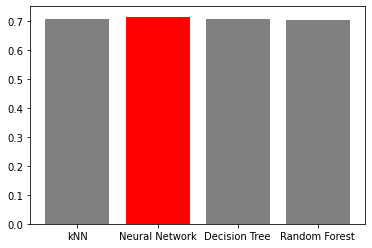

In [114]:
plt.bar(range(len(best_combos)), list(best_combos.values()), align='center', color = ['Grey', 'Red', 'Grey', 'Grey'])
plt.xticks(range(len(best_combos)), list(best_combos.keys()))

plt.show()

# 5. Final model and predictions on historical data to check profitability 

### 5.1 Building the final model again and making predictions with it.

In [77]:
mlp_model = MLPClassifier(alpha=0.01, learning_rate="invscaling")
mlp_model.fit(X_train,y_train)
mlp_model_score = mlp_model.score(X_train,y_train)
mlp__model_test = mlp_model.score(X_test,y_test)


print("accuracy train {:.3f}  test {:.3f}".format(mlp_model_score, mlp__model_test))


accuracy train 0.705  test 0.710


In [78]:
X["predictions"] = mlp_model.predict(X)

In [79]:
X["winner"] = y

### 5.2 Importing the Odds.

In [80]:
df_odds = pd.read_excel('newestdataset_odds.xlsx')

In [81]:
df_odds[["R_odds_dec", "B_odds_dec"]]

,R_odds_dec,B_odds_dec
0,2.450000,1.606061
1,1.090909,8.000000
2,1.476190,2.750000
3,4.000000,1.277778
4,1.625000,2.400000
...,...,...
5139,NaN,NaN
5140,NaN,NaN
5141,NaN,NaN
5142,NaN,NaN


### 5.3 Filling missing odds with the average value. 

In [82]:
df_odds["R_odds_dec"] = df_odds["R_odds_dec"].fillna(df_odds["R_odds_dec"].mean())
df_odds["B_odds_dec"] = df_odds["B_odds_dec"].fillna(df_odds["B_odds_dec"].mean())

In [83]:
df_odds[["R_odds_dec", "B_odds_dec"]]

,R_odds_dec,B_odds_dec
0,2.450000,1.606061
1,1.090909,8.000000
2,1.476190,2.750000
3,4.000000,1.277778
4,1.625000,2.400000
...,...,...
5139,1.965412,2.716405
5140,1.965412,2.716405
5141,1.965412,2.716405
5142,1.965412,2.716405


### 5.4 Dropping the draw fights to get equal shape between odds and X. We need to remeber to substact this from the profit. 


In [84]:
df_odds = df_odds.drop(df_odds[df_odds.Winner == 'Draw'].index)

### 5.5 Determining the winnings bets. 

In [85]:
X["winner_bet"] =  np.where(X["winner"] == "Red", df_odds["R_odds_dec"], df_odds["B_odds_dec"])

### 5.6 If the prediction is correct return 1 else -1.

In [86]:
X["comparison_column"] = np.where(X["predictions"] == X["winner"], 1*X["winner_bet"], -1)

### 5.7 Calculating the profit with 100 DKK per fight.

In [87]:
X["profit"] = np.where(X["comparison_column"] > 0, (X["comparison_column"]*100)-100, -1*100) 

In [88]:
X["profit"]

0       145.000000
1         9.090909
2        47.619048
3      -100.000000
4      -100.000000
           ...    
5139     96.541162
5140   -100.000000
5141     96.541162
5142     96.541162
5143     96.541162
Name: profit, Length: 5061, dtype: float64

In [89]:
print("profit :")
X["profit"].sum()

profit :


105999.85917944272

### 5.8 if our initial investment is 514 300 the percentage increase in portofolio is:

In [90]:
((( X["profit"].sum()) / (5143*100)))*100

20.610511215135663

In [91]:
X.to_excel("output_with_predictions_and_profit.xlsx") 